#### Problem Tutorial 1: Regression Model

We want to predict the gas consumption (in millions of gallons/year) in 48 of the US states
based on some key features. 

These features are 
 * petrol tax (in cents); 
 * per capital income (in US dollars);
 * paved highway (in miles); and
 * population of people with driving licences

<table>
  <tr><td>
    <img src="https://informedinfrastructure.com/wp-content/uploads/2012/06/traffic-jam.jpg"
         alt="Bank Note " width="600">
  </td></tr>
  <tr><td></td></tr>
  <tr><td>
  <img src="https://miro.medium.com/max/593/1*pfmeGgGM5sxmLBQ5IQfQew.png"
         alt="Matrix" width="600">
  <tr><td></td></tr>
  <tr><td>And seems like a bad consumption problem to have ...</td></tr>
</table>
  
#### Solution:

Since this is a regression problem where the value is a range of numbers, we can use the
common Random Forest Algorithm in Scikit-Learn. Most regression models are evaluated with
four [standard evalution metrics](https://medium.com/usf-msds/choosing-the-right-metric-for-machine-learning-models-part-1-a99d7d7414e4): 

* Mean Absolute Error (MAE)
* Mean Squared Error (MSE)
* Root Mean Squared Error (RSME)
* R-squared (r2)

This example is borrowed from this [source](https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/) and modified and modularized for this tutorial

Aim of this this:

1. Understand MLflow Tracking API
2. How to use the MLflow Tracking API
3. Use the MLflow API to experiment several Runs
4. Interpret and observe runs via the MLflow UI

Some Resources:
* https://mlflow.org/docs/latest/python_api/mlflow.html
* https://www.saedsayad.com/decision_tree_reg.htm
* https://towardsdatascience.com/understanding-random-forest-58381e0602d2
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
* https://towardsdatascience.com/regression-an-explanation-of-regression-metrics-and-what-can-go-wrong-a39a9793d914
* https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

Define all the classes and bring them into scope

In [0]:
%run ./setup/class_setup

class utilitis definition `Utils`

Declared various Utitily class utility methods: 
 Declared load_data( path:file_name ) for data files 
 Declared plot_graphs( ... ) for ploting artifacts 
 Declared get_mlflow_directory_path for mlruns path 
 Declared get_temporary_directory_path( ... ) temporary artifact files 
 Declared plot_residual_graphs( ... ) for plotting residues 
 Declared print_pandas_dataset( name:String ) to print Pandas dataFrame


Random Forest class definition for the `RFRModel`

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


Declared RandomForestRegress Model Class with methods: 
 Declared model() returns existing instance of Random Forest Model 
 Declared new_instance(params={...} returns a new instance of RandomForestClassifierModel 
 Declared mlflow_run(DataFrame, run_name="name") returns experiment_ID, run_ID

Randorm Forest Classifier class definition `RFCModel`

### Load the Dataset

In [0]:
# load and print dataset
dataset = Utils.load_data("https://github.com/dmatrix/tutorials/raw/master/mlflow/labs/data/petrol_consumption.csv")
dataset.head(5)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


Get descriptive statistics for the features

In [0]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


2025/07/31 04:07:31 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
🔗 View Logged Model at: https://dbc-b2d30165-76df.cloud.databricks.com/ml/experiments/4230816160263195/models/m-b6132b79f39a414eb7f645b06c2ab0cf?o=4476931374519718
2025/07/31 04:07:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


----------------------------------------------------------------------------------------------------
Inside MLflow Run with run_id b6b3885bf659405e96ee3be5999543ab and experiment_id 4230816160263195
Estimator trees        : 20
Mean Absolute Error    : 48.821053824754586
Mean Squared Error     : 4098.174185284661
Root Mean Squared Error: 64.01698356908626
R2                     : 0.3005860312103783
MLflow Run completed with run_id b6b3885bf659405e96ee3be5999543ab and experiment_id 4230816160263195
----------------------------------------------------------------------------------------------------


2025/07/31 04:07:40 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
🔗 View Logged Model at: https://dbc-b2d30165-76df.cloud.databricks.com/ml/experiments/4230816160263195/models/m-28da28915eec4717b88d03af1d70a8ea?o=4476931374519718
2025/07/31 04:07:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


----------------------------------------------------------------------------------------------------
Inside MLflow Run with run_id 6b6f07c1c8124092ba3048db3a1775a0 and experiment_id 4230816160263195
Estimator trees        : 70
Mean Absolute Error    : 56.530566934815894
Mean Squared Error     : 4425.100754752321
Root Mean Squared Error: 66.52143079303332
R2                     : 0.2447911823054214
MLflow Run completed with run_id 6b6f07c1c8124092ba3048db3a1775a0 and experiment_id 4230816160263195
----------------------------------------------------------------------------------------------------


2025/07/31 04:07:48 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
🔗 View Logged Model at: https://dbc-b2d30165-76df.cloud.databricks.com/ml/experiments/4230816160263195/models/m-65fd8db616ed48d3ba93f59e119004cf?o=4476931374519718
2025/07/31 04:07:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


----------------------------------------------------------------------------------------------------
Inside MLflow Run with run_id 371a4107db1a4876986f9cc6e853b5d5 and experiment_id 4230816160263195
Estimator trees        : 120
Mean Absolute Error    : 48.881401455026484
Mean Squared Error     : 3431.5357987556627
Root Mean Squared Error: 58.579312037234295
R2                     : 0.41435772040405516
MLflow Run completed with run_id 371a4107db1a4876986f9cc6e853b5d5 and experiment_id 4230816160263195
----------------------------------------------------------------------------------------------------


2025/07/31 04:07:56 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
🔗 View Logged Model at: https://dbc-b2d30165-76df.cloud.databricks.com/ml/experiments/4230816160263195/models/m-8f3db81a445c488c950999f0ce5bd533?o=4476931374519718
2025/07/31 04:08:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


----------------------------------------------------------------------------------------------------
Inside MLflow Run with run_id e981b7743c75465096b05a107fc64fe0 and experiment_id 4230816160263195
Estimator trees        : 170
Mean Absolute Error    : 49.010612044817925
Mean Squared Error     : 3602.0388387577973
Root Mean Squared Error: 60.016987918070306
R2                     : 0.385258857713741
MLflow Run completed with run_id e981b7743c75465096b05a107fc64fe0 and experiment_id 4230816160263195
----------------------------------------------------------------------------------------------------


2025/07/31 04:08:04 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
🔗 View Logged Model at: https://dbc-b2d30165-76df.cloud.databricks.com/ml/experiments/4230816160263195/models/m-e1815880f8c24055ac5454ac135b10e1?o=4476931374519718
2025/07/31 04:08:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


----------------------------------------------------------------------------------------------------
Inside MLflow Run with run_id 38282c49e17840c79108e6f90a4ed491 and experiment_id 4230816160263195
Estimator trees        : 220
Mean Absolute Error    : 51.74196969696968
Mean Squared Error     : 3787.3635305325975
Root Mean Squared Error: 61.54155937683573
R2                     : 0.35363046118185404
MLflow Run completed with run_id 38282c49e17840c79108e6f90a4ed491 and experiment_id 4230816160263195
----------------------------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

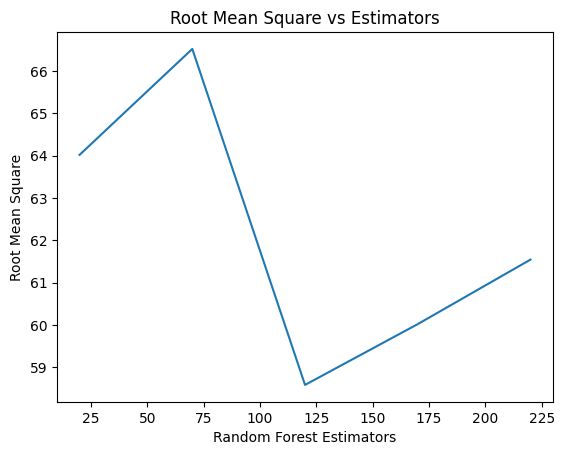

In [0]:
# iterate over several runs with different parameters, such as number of trees. 
# For expermientation, try max_depth and consult the documentation what tunning parameters
# may affect a better outcome.
max_depth = 0
for n in range (20, 250, 50):
  max_depth = max_depth + 2
  params = {"n_estimators": n, "max_depth": max_depth}
  rfr = RFRModel.new_instance(params)
  (experimentID, runID) = rfr.mlflow_run(dataset)
  print("MLflow Run completed with run_id {} and experiment_id {}".format(runID, experimentID))
  print("-" * 100)

**Note**:

With 20 trees, the root mean squared error is `64.93`, which is greater than 10 percent of the average petrol consumption i.e., `576.77`. 
This may sugggest that we have not used enough estimators (trees).

### Let's Explorethe MLflow  UI

* Add Notes & Tags
* Compare Runs pick two best runs
* Annotate with descriptions and tags
* Evaluate the best run

#### Homework Assignment. Try different runs with:
1. Change the [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) to a [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linearregression#sklearn.linear_model.LinearRegression)
    * compare the evaluation metrics and ascertain which one is better
2. Change or add parameters, such as depth of the tree or random_state: 42 etc.
3. Change or alter the range of runs and increments of n_estimators
4. Check in MLfow UI if the metrics are affected
5. Convert your machine learning model code from work, use MLflow APIs to track your experiment
6. Explore the [MLflow GitHub Examples](https://mlflow.org/docs/latest/tutorials-and-examples/index.html)